
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


## Problem Statment:1 Books dataset

In [251]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as ss
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
books_df = pd.read_csv('book.csv')
books_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
report = pp.ProfileReport(books_df)
report.to_widgets()

#### for support = 10% and confidence 60%

In [237]:
#Apriori algo gives the frequency of the param
#for support = 10% and confidence 60%
frequent_itemsets = apriori(books_df,min_support=.1,use_colnames=True)
#association_rules gives the list of all rules with the minimum 60 % of confidence
rules = association_rules(frequent_itemsets,metric='confidence',min_threshold=.6)#metric can be confidence or lift
rules
#list of all rules with 10% support and 60 % confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [238]:
# get the list of all rules with lift > 1 for more dependency
rules = rules[rules.lift>1]

In [239]:
#func to concat first two cols
def concat(rules):
    concatenatedList = []
    for p in np.arange(len(rules)):
        concatenatedList.append(list(rules.antecedents[p])+list(rules.consequents[p]))
    return concatenatedList

#Func to find duplicate rules
def listOfDuplicateIndex(concatenatedList):
    index_list = []
    for i in np.arange(len(concatenatedList)):
        if i not in index_list:
            dict_of_counts = {item: concatenatedList.count(item) for item in concatenatedList[i]}
            #print(dict_of_counts)
            for k in np.arange(len(concatenatedList)):
                if(i != k and len(concatenatedList[i]) == len(concatenatedList[k])):
                    #print('K value===============',k)
                    dict_of_counts1 = {item1: concatenatedList.count(item1) for item1 in concatenatedList[k]}
                    #print(dict_of_counts)
                    if(dict_of_counts == dict_of_counts1):
                        index_list.append(k)
    return index_list
        



In [241]:
#remove duplicate rules
concatenatedList = concat(rules)  
index = listOfDuplicateIndex(concatenatedList)
print('List of index to be dropped \n',index)
print('Before deleting duplicate rows of the rules',len(rules))
rules = rules.drop(index,axis=0).reset_index(drop=True)
print('Before deleting duplicate rows of the rules',len(rules))

List of index to be dropped 
 [13, 15, 17, 19, 21, 24, 26, 29]
Before deleting duplicate rows of the rules 30
Before deleting duplicate rows of the rules 22


In [242]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


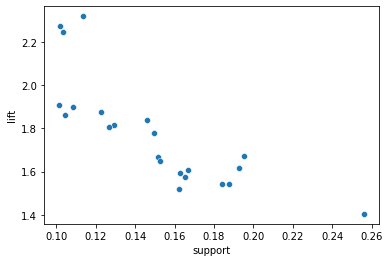

<AxesSubplot:xlabel='support', ylabel='confidence'>

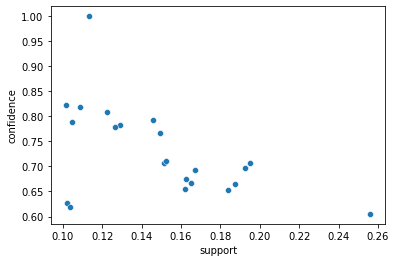

In [257]:
ss.scatterplot(x=rules.support,y=rules.lift,data=rules)
plt.show()
ss.scatterplot(x=rules.support,y=rules.confidence,data=rules)

#### for support = 10% and confidence 80%

In [260]:
frequency = apriori(books_df,min_support=.1,use_colnames=True)
rules = association_rules(frequency,min_threshold=.8,metric='confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


In [261]:
rules = rules[rules.lift > 1]

In [262]:
#remove duplicate rules
concatenatedList = concat(rules)  
index = listOfDuplicateIndex(concatenatedList)
print('List of index to be dropped \n',index)
print('Before deleting duplicate rows of the rules',len(rules))
rules = rules.drop(index,axis=0).reset_index(drop=True)
print('Before deleting duplicate rows of the rules',len(rules))

List of index to be dropped 
 [2]
Before deleting duplicate rows of the rules 6
Before deleting duplicate rows of the rules 5


In [263]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
3,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
4,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


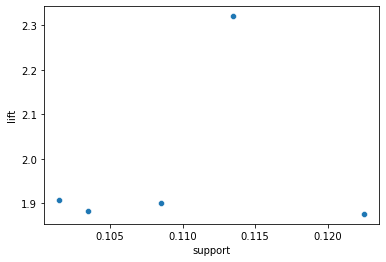

<AxesSubplot:xlabel='support', ylabel='confidence'>

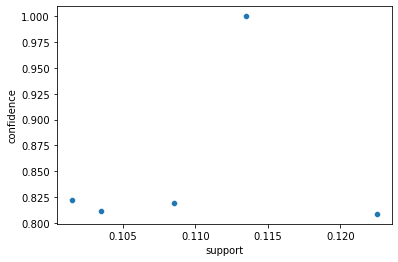

In [264]:
ss.scatterplot(x=rules.support,y=rules.lift,data=rules)
plt.show()
ss.scatterplot(x=rules.support,y=rules.confidence,data=rules)

#### for support = 10% and confidence 70%

In [268]:
frequency = apriori(books_df,min_support=.1,use_colnames=True)
rules = association_rules(frequency,min_threshold=.7,metric='confidence')
rules = rules[rules.lift >1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


In [269]:
#remove duplicate rules
concatenatedList = concat(rules)  
index = listOfDuplicateIndex(concatenatedList)
print('List of index to be dropped \n',index)
print('Before deleting duplicate rows of the rules',len(rules))
rules = rules.drop(index,axis=0).reset_index(drop=True)
print('Before deleting duplicate rows of the rules',len(rules))

List of index to be dropped 
 [5, 7, 9, 11, 13]
Before deleting duplicate rows of the rules 19
Before deleting duplicate rows of the rules 14


In [270]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
6,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
7,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403
8,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571
9,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


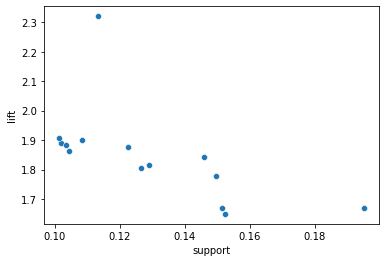

<AxesSubplot:xlabel='support', ylabel='confidence'>

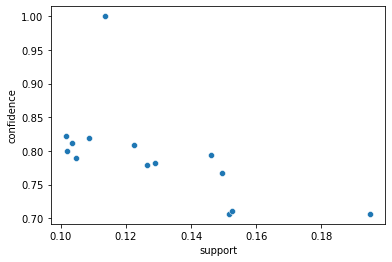

In [271]:
ss.scatterplot(x=rules.support,y=rules.lift,data=rules)
plt.show()
ss.scatterplot(x=rules.support,y=rules.confidence,data=rules)

## Problem Statment:2 my_movies dataset

In [272]:
movies_df = pd.read_csv('my_movies.csv')
movies_df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [273]:
movies_df1 = movies_df.iloc[:,5:]
movies_df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [274]:
movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


#### for support = 10% and confidence = 70%

In [278]:
frequency = apriori(movies_df1,min_support=.1,use_colnames=True)
rules = association_rules(frequency,min_threshold=.7,metric='confidence')
rules = rules[rules.lift >1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [279]:
#remove duplicate rules
concatenatedList = concat(rules)  
index = listOfDuplicateIndex(concatenatedList)
print('List of index to be dropped \n',index)
print('Before deleting duplicate rows of the rules',len(rules))
rules = rules.drop(index,axis=0).reset_index(drop=True)
print('Before deleting duplicate rows of the rules',len(rules))
rules

List of index to be dropped 
 [1, 5, 9, 14, 16, 17, 20, 21, 23, 25, 27, 28, 30, 32, 34, 35, 37, 38, 40, 41, 42, 44, 46, 47, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
Before deleting duplicate rows of the rules 129
Before deleting duplicate rows of the rules 33


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
5,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
8,(Braveheart),(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
9,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


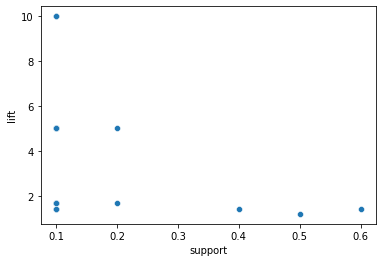

<AxesSubplot:xlabel='support', ylabel='confidence'>

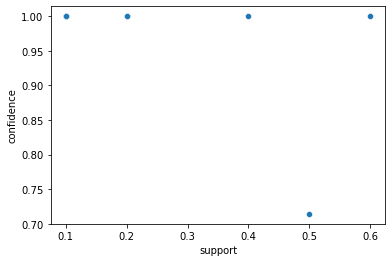

In [280]:
ss.scatterplot(x=rules.support,y=rules.lift,data=rules)
plt.show()
ss.scatterplot(x=rules.support,y=rules.confidence,data=rules)

#### for support =15% and confidence =80%

In [281]:
frequency = apriori(movies_df1,min_support=.15,use_colnames=True)
rules = association_rules(frequency,min_threshold=.8,metric='confidence')
rules = rules[rules.lift >1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [282]:
#remove duplicate rules
concatenatedList = concat(rules)  
index = listOfDuplicateIndex(concatenatedList)
print('List of index to be dropped \n',index)
print('Before deleting duplicate rows of the rules',len(rules))
rules = rules.drop(index,axis=0).reset_index(drop=True)
print('Before deleting duplicate rows of the rules',len(rules))
rules

List of index to be dropped 
 [3, 5, 7]
Before deleting duplicate rows of the rules 8
Before deleting duplicate rows of the rules 5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


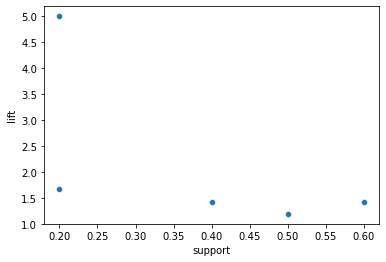

<AxesSubplot:xlabel='support', ylabel='confidence'>

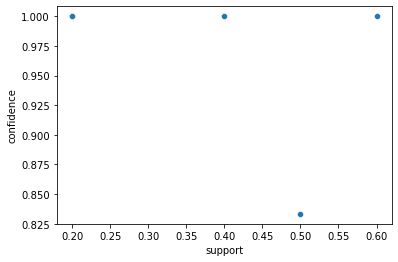

In [283]:
ss.scatterplot(x=rules.support,y=rules.lift,data=rules)
plt.show()
ss.scatterplot(x=rules.support,y=rules.confidence,data=rules)

#### for support =15% and confidence =60%

In [284]:
frequency = apriori(movies_df1,min_support=.15,use_colnames=True)
rules = association_rules(frequency,min_threshold=.6,metric='confidence')
rules = rules[rules.lift >1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [285]:
#remove duplicate rules
concatenatedList = concat(rules)  
index = listOfDuplicateIndex(concatenatedList)
print('List of index to be dropped \n',index)
print('Before deleting duplicate rows of the rules',len(rules))
rules = rules.drop(index,axis=0).reset_index(drop=True)
print('Before deleting duplicate rows of the rules',len(rules))
rules

List of index to be dropped 
 [1, 3, 6, 8, 10, 11, 12, 13]
Before deleting duplicate rows of the rules 14
Before deleting duplicate rows of the rules 6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


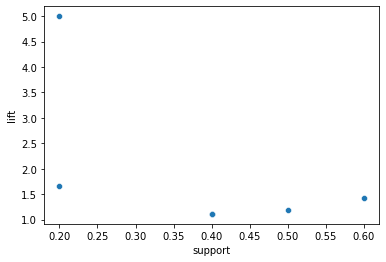

<AxesSubplot:xlabel='support', ylabel='confidence'>

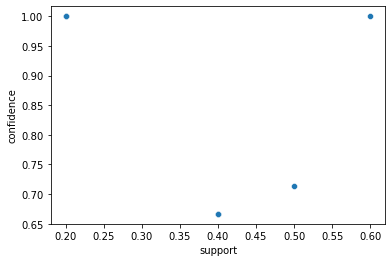

In [286]:
ss.scatterplot(x=rules.support,y=rules.lift,data=rules)
plt.show()
ss.scatterplot(x=rules.support,y=rules.confidence,data=rules)